This notebook contains the plotting functions used to plot the results of the meta-analysis without interaction terms (Figure 3d, Extended Data Figure 9, and Supplementary Figures 4). Note that the model results with interaction terms are taken into account in these plots.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import colors, patches
import seaborn as sns
import logging, warnings

/home/icb/malte.luecken/anaconda3/envs/cov19_py/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 35)
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
#User inputs
folder = '/storage/groups/ml01/workspace/malte.luecken/2020_cov19_study'

output_folder = 'diffxpy_out/'

base = 'COVID19_lung_atlas_revision_v3_lung_cov19_poissonglm_smoking'

In [4]:
res_lvl2_ints = pd.read_csv(folder+'/'+output_folder+base+'_nUMIoffset_testInts_lvl2_full.csv', index_col=0)
res_lvl2_ints_ho = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_testInts_lvl2_full.csv', index_col=0)
res_lvl2_ints_ho_summary = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_testInts_lvl2_summary.csv', index_col=0)
res_lvl2_ints_pseudo = pd.read_csv(folder+'/'+output_folder+base+'_pseudo_nUMIoffset_testInts_lvl2_full.csv', index_col=0)

In [5]:
res_lvl2 = pd.read_csv(folder+'/'+output_folder+base+'_nUMIoffset_noInts_lvl2_full.csv', index_col=0)
res_lvl2_ho = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_noInts_lvl2_full.csv', index_col=0)
res_lvl2_ho_summary = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_noInts_lvl2_summary.csv', index_col=0)
res_lvl2_pseudo = pd.read_csv(folder+'/'+output_folder+base+'_pseudo_nUMIoffset_noInts_lvl2_full.csv', index_col=0)

In [6]:
res_lvl3_ints = pd.read_csv(folder+'/'+output_folder+base+'_nUMIoffset_testInts_lvl3_full.csv', index_col=0)
res_lvl3_ints_ho = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_testInts_lvl3_full.csv', index_col=0)
res_lvl3_ints_ho_summary = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_testInts_lvl3_summary.csv', index_col=0)
res_lvl3_ints_pseudo = pd.read_csv(folder+'/'+output_folder+base+'_pseudo_nUMIoffset_testInts_lvl3_full.csv', index_col=0)

In [7]:
res_lvl3 = pd.read_csv(folder+'/'+output_folder+base+'_nUMIoffset_noInts_lvl3_full.csv', index_col=0)
res_lvl3_ho = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_noInts_lvl3_full.csv', index_col=0)
res_lvl3_ho_summary = pd.read_csv(folder+'/'+output_folder+base+'_holdouts_nUMIoffset_noInts_lvl3_summary.csv', index_col=0)
res_lvl3_pseudo = pd.read_csv(folder+'/'+output_folder+base+'_pseudo_nUMIoffset_noInts_lvl3_full.csv', index_col=0)

In [8]:
res_lvl3.head()

,gene,cell_identity,covariate,coef,coef_sd,pval,adj_pvals
0,ACE2,Macrophages,sex[T.male],0.079347,0.268355,0.767475,0.767475
1,ACE2,Macrophages,age,0.006745,0.006974,0.333406,0.428664
2,ACE2,Macrophages,smoking_status[T.True],-0.183397,0.328642,0.576814,0.648916
3,TMPRSS2,Macrophages,sex[T.male],-0.331306,0.072662,0.000005,0.000012
4,TMPRSS2,Macrophages,age,-0.003322,0.002135,0.119689,0.210039


In [9]:
res_lvl3.dtypes

gene              object
cell_identity     object
covariate         object
coef             float64
coef_sd          float64
pval             float64
adj_pvals        float64
dtype: object

# Plotting

In [10]:
sns.set(font_scale=2.5, style='white')

In [11]:
res_lvl3['cell_identity'].unique()

array(['Macrophages', 'Basal', 'AT2', 'T cell lineage', 'Monocytes',
       'Multiciliated lineage', 'Submucosal Secretory', 'AT1',
       'Innate lymphoid cells', 'Secretory', 'Capillary', 'Mast cells',
       'B cell lineage', 'Fibroblasts', 'Dendritic cells', 'Venous',
       'Lymphatic EC', 'Arterial', 'Rare', 'Airway smooth muscle'],
      dtype=object)

In [12]:
res_lvl3.head()
res_lvl3_ints.head()

,gene,cell_identity,covariate,coef,coef_sd,pval,adj_pvals
0,ACE2,Macrophages,sex[T.male],0.079347,0.268355,0.767475,0.767475
1,ACE2,Macrophages,age,0.006745,0.006974,0.333406,0.428664
2,ACE2,Macrophages,smoking_status[T.True],-0.183397,0.328642,0.576814,0.648916
3,TMPRSS2,Macrophages,sex[T.male],-0.331306,0.072662,0.000005,0.000012
4,TMPRSS2,Macrophages,age,-0.003322,0.002135,0.119689,0.210039


,gene,cell_identity,covariate,eval_at,coef,coef_sd,pval,adj_pvals
0,ACE2,Macrophages,sex[T.male],31yr NS,0.815131,0.363377,0.024883,0.049766
1,ACE2,Macrophages,sex[T.male],31yr S,0.103947,0.766362,0.892108,0.917597
2,ACE2,Macrophages,sex[T.male],62yr NS,-0.621819,0.501752,0.215236,0.286981
3,ACE2,Macrophages,sex[T.male],62yr S,-1.333003,0.584259,0.022517,0.047683
4,ACE2,Macrophages,age,F NS,0.021959,0.009962,0.027511,0.052126


In [13]:
res_lvl3

,gene,cell_identity,covariate,coef,coef_sd,pval,adj_pvals
0,ACE2,Macrophages,sex[T.male],0.079347,0.268355,7.674755e-01,7.674755e-01
1,ACE2,Macrophages,age,0.006745,0.006974,3.334057e-01,4.286644e-01
2,ACE2,Macrophages,smoking_status[T.True],-0.183397,0.328642,5.768144e-01,6.489162e-01
3,TMPRSS2,Macrophages,sex[T.male],-0.331306,0.072662,5.125795e-06,1.153304e-05
4,TMPRSS2,Macrophages,age,-0.003322,0.002135,1.196886e-01,2.100394e-01
5,TMPRSS2,Macrophages,smoking_status[T.True],0.134248,0.090973,1.400263e-01,2.100394e-01
6,CTSL,Macrophages,sex[T.male],-0.167304,0.002610,0.000000e+00,0.000000e+00
7,CTSL,Macrophages,age,0.002582,0.000084,2.672846e-207,1.202781e-206
8,CTSL,Macrophages,smoking_status[T.True],0.100365,0.003562,1.222302e-174,3.666907e-174
9,ACE2,Basal,sex[T.male],0.050698,0.047738,2.882331e-01,2.882331e-01


## Level 3

In [14]:
# Prep plotting

# Order cell identity category
res_lvl3['cell_identity'] = res_lvl3['cell_identity'].astype('category').cat.set_categories(['Basal', 'Multiciliated lineage', 'Secretory', 'Rare', 'Submucosal Secretory', 'AT1', 'AT2', 'Arterial', 'Capillary', 'Venous', 'Lymphatic EC', 'Fibroblasts', 'Airway smooth muscle', 'B cell lineage', 'T cell lineage', 'Innate lymphoid cells', 'Dendritic cells', 'Macrophages', 'Monocytes', 'Mast cells'], ordered=True)
res_lvl3 = res_lvl3.sort_values(by='cell_identity')

# Create hierarchy of cell identities
ct_hierarchy = {'Epithelial':['Basal', 'Multiciliated lineage', 'Secretory', 'Rare', 'Submucosal Secretory', 'AT1', 'AT2'], 'Endothelial':['Arterial', 'Capillary', 'Venous', 'Lymphatic EC'], 'Stroma':['Fibroblasts', 'Airway smooth muscle'], 'Immune':['B cell lineage', 'T cell lineage', 'Innate lymphoid cells', 'Dendritic cells', 'Macrophages', 'Monocytes', 'Mast cells']}
ct_mapping_up = dict()
for key,val in ct_hierarchy.items():
    for v in val:
        ct_mapping_up[v] = key

# Assign cell type compartment covariate
res_lvl3['compartment'] = [ct_mapping_up[ct] for ct in res_lvl3['cell_identity']]        

# Check if bulk and sc effect directions agree
res_lvl3_pseudo.index = ['_'.join(vals).replace(' ','_') for vals in res_lvl3_pseudo[['cell_identity', 'covariate', 'gene']].values.tolist()]
res_lvl3.index = ['_'.join(vals).replace(' ', '_') for vals in res_lvl3[['cell_identity', 'covariate', 'gene']].values.tolist()]
res_lvl3['signif_bulk_agree'] = [(val < 0.05) and ((res_lvl3['coef'].loc[res_lvl3.index[i]]* res_lvl3_pseudo['coef'].loc[res_lvl3.index[i]]) > 0) for i,val in enumerate(res_lvl3['adj_pvals'])]


# Check if simple and complex models agree

# Check if bulk and sc effect directions agree in interaction model
res_lvl3_ints_pseudo.index = ['_'.join(vals).replace(' ','_') for vals in res_lvl3_ints_pseudo[['cell_identity', 'covariate', 'gene', 'eval_at']].values.tolist()]
res_lvl3_ints.index = ['_'.join(vals).replace(' ', '_') for vals in res_lvl3_ints[['cell_identity', 'covariate', 'gene', 'eval_at']].values.tolist()]
res_lvl3_ints['signif_bulk_agree'] = [(val < 0.05) and ((res_lvl3_ints['coef'].loc[res_lvl3_ints.index[i]]* res_lvl3_ints_pseudo['coef'].loc[res_lvl3_ints.index[i]]) > 0) for i,val in enumerate(res_lvl3_ints['adj_pvals'])]

# Criteria:
# 1. No "indication" in opposite direction (significant and pseudo agrees)
# 2. At least 1 "indication" in the correct direction.

bulk_complex_agree = []

for idx in res_lvl3.index:
    mask = [str(idx) in str(i) for i in res_lvl3_ints.index]
    tmp = res_lvl3_ints.loc[mask]
    complex_vals = tmp['coef'].loc[tmp['signif_bulk_agree'].values].values

    if len(complex_vals) == 0:
        # No indication in complex interaction model
        bulk_complex_agree.append(False)

    else:
        # Check that all indications or robust trends point in the same direction
        # as the simple model case:
        int_agree = np.all([res_lvl3['coef'].loc[idx]*val > 0 for val in complex_vals])
        val = res_lvl3['signif_bulk_agree'].loc[idx] and int_agree
        bulk_complex_agree.append(val)
        
res_lvl3['signif_bulk_complex_agree'] = bulk_complex_agree


res_lvl3['compartment'] = res_lvl3['compartment'].astype('category').cat.set_categories(['Epithelial', 'Endothelial', 'Stroma', 'Immune'], ordered=True)
res_lvl3['covariate_simple'] = res_lvl3['covariate'].astype('category').cat.rename_categories(['Age', 'Sex', 'Smoking_status'])

# Assign eval_at numbers
res_lvl3 = res_lvl3.sort_values(by=['cell_identity', 'covariate', 'gene'])

/home/icb/malte.luecken/anaconda3/envs/cov19_py/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0, 6, 'Age')

Text(0, 6, 'Sex')

Text(0, 6, 'Smoking_status')

Text(-10.0, 0, 'Epithelial')

Text(-10.0, 0, 'Endothelial')

Text(-10.0, 0, 'Stroma')

Text(-10.0, 0, 'Immune')

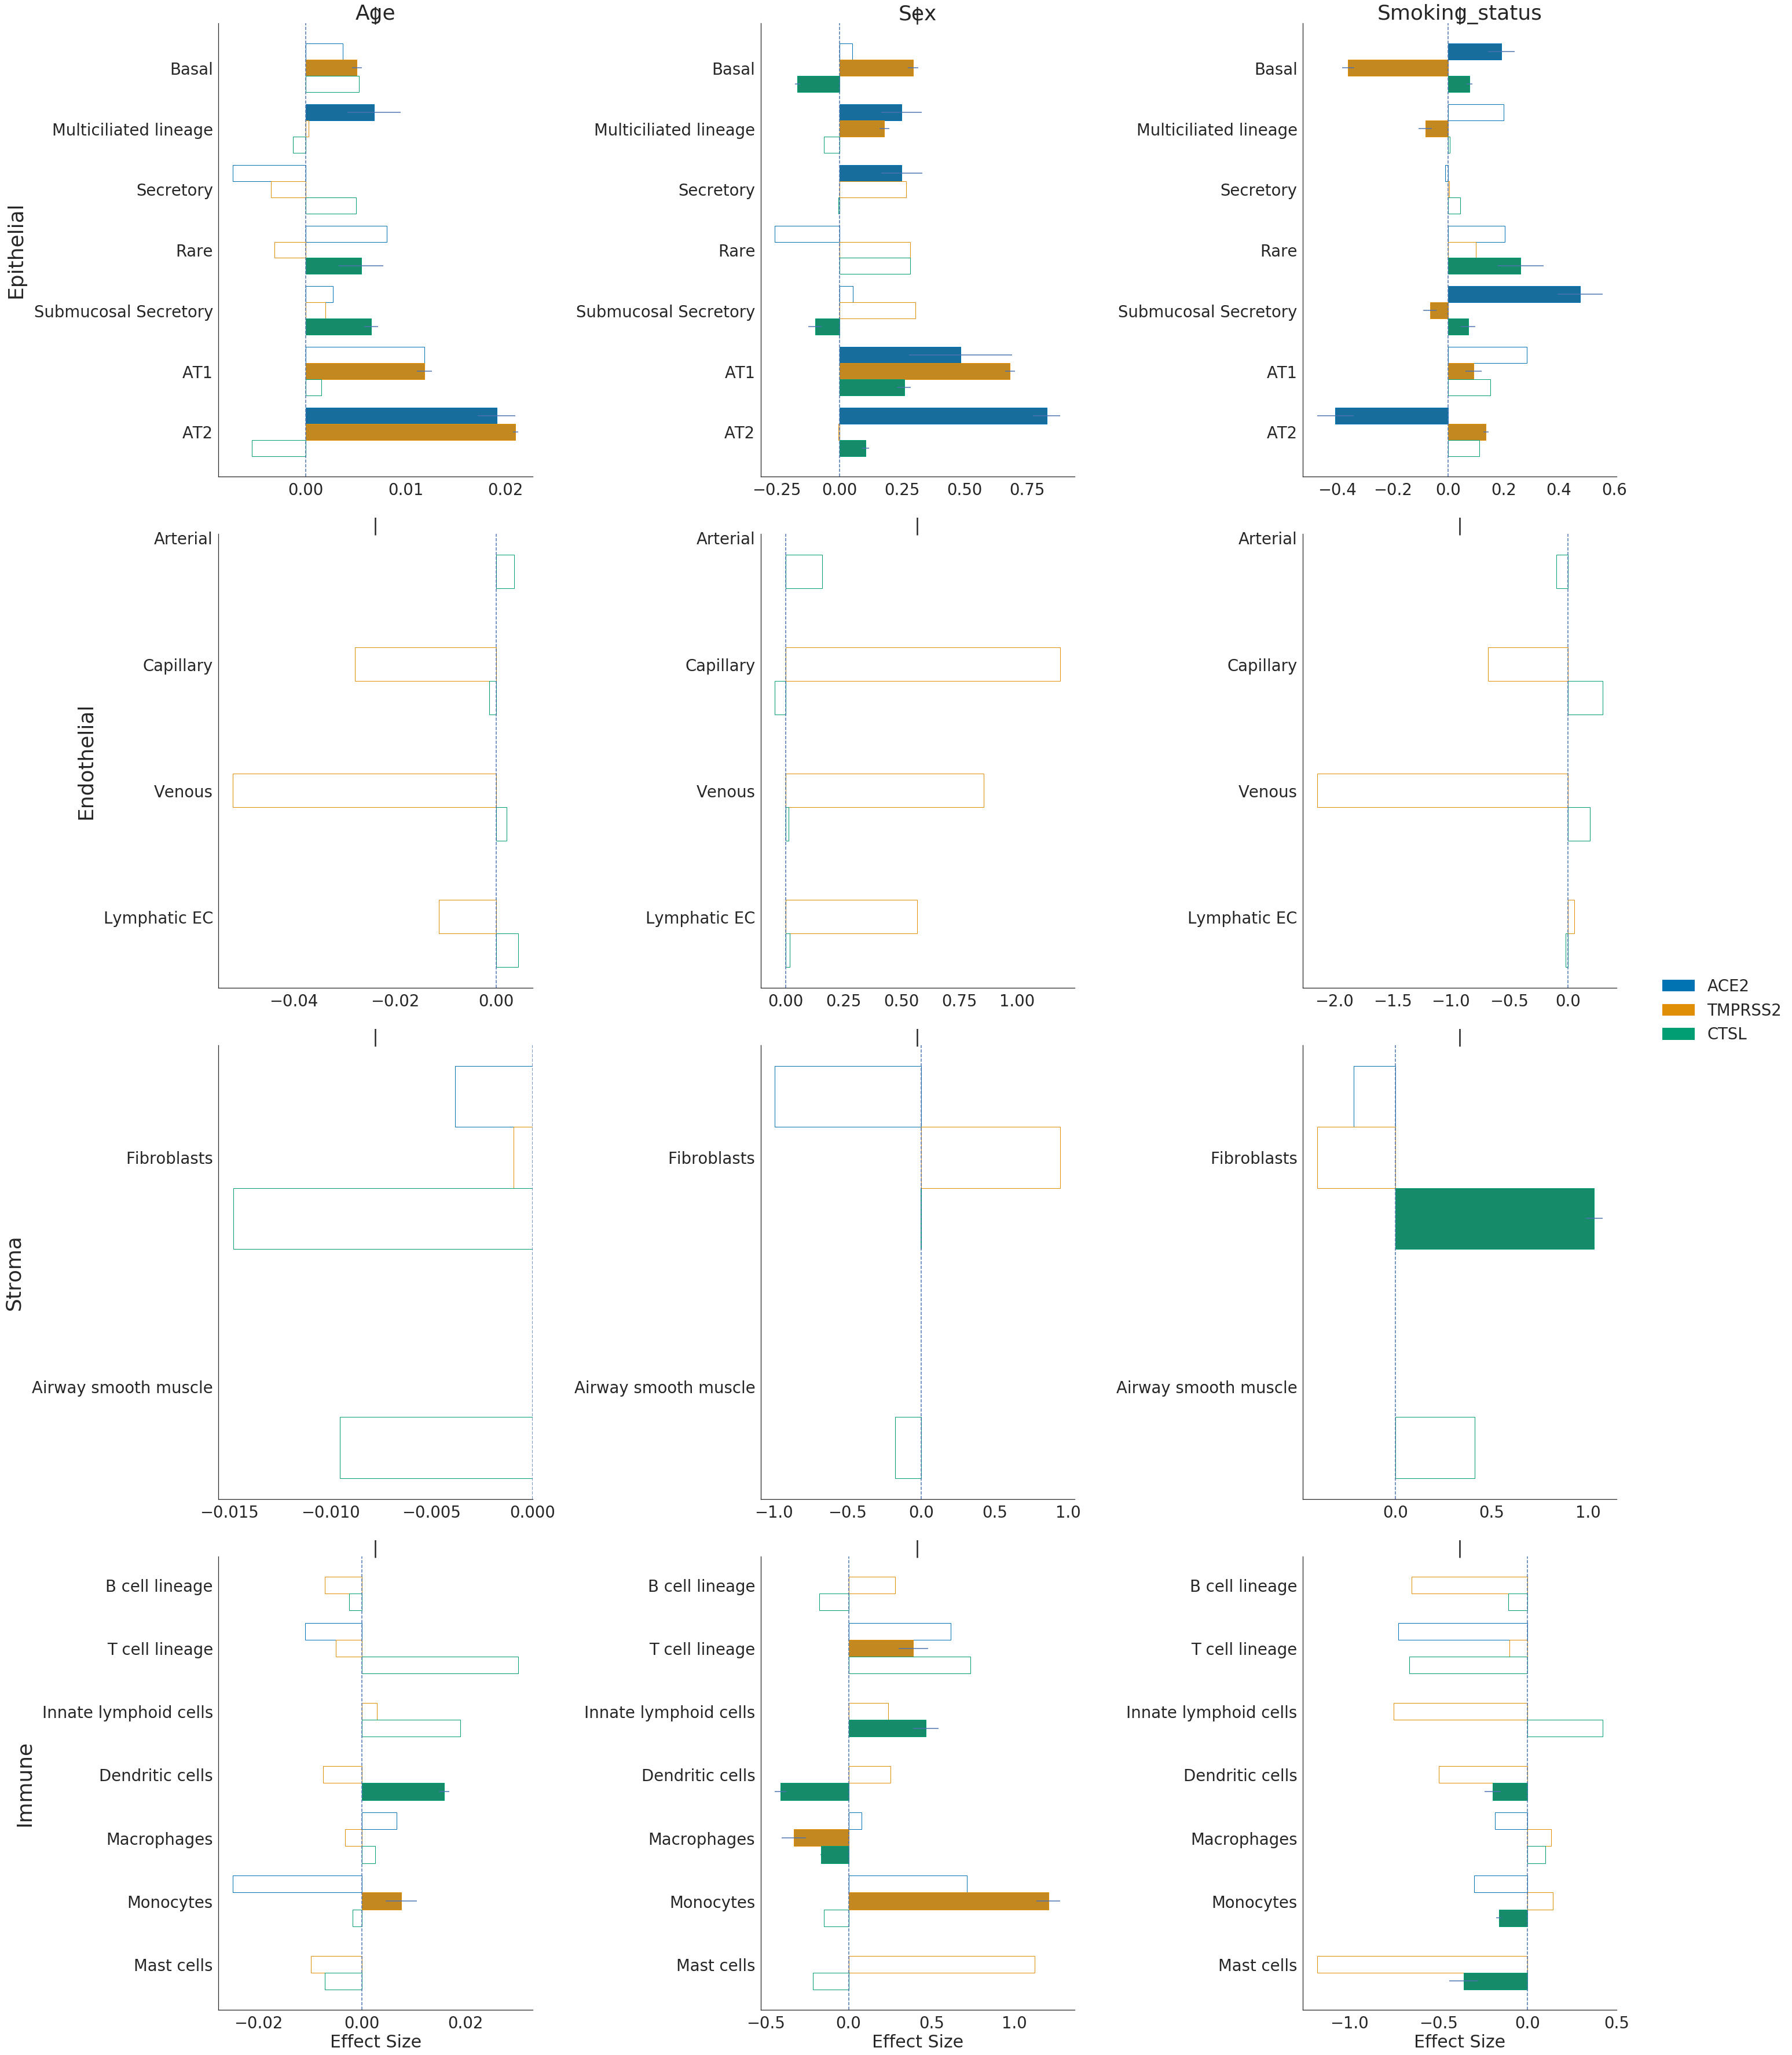

In [15]:
color_base = sns.color_palette('colorblind')[:3]
colors = color_base

gene_order = ['ACE2', 'TMPRSS2', 'CTSL']

cat_order = ['Age', 'Sex', 'Smoking_status']
comp_order = ['Epithelial', 'Endothelial', 'Stroma', 'Immune']
hue_col = 'gene'

p1 = sns.catplot(y='cell_identity', x='coef', hue=hue_col, ci=None, kind='bar', col='covariate_simple', row='compartment', sharey='none', sharex='none', orient='h', data=res_lvl3, legend=False, palette=sns.color_palette(colors), hue_order=gene_order)

for j,group in enumerate(p1.axes):
    for i,ax in enumerate(group):
        ax.axvline(0, ls='--')
        tmp = plt.setp(ax.patches, linewidth=1, edgecolor='black')
        
        dat_sub = res_lvl3.loc[(res_lvl3['covariate_simple'] == cat_order[i]) & (res_lvl3['compartment'] == comp_order[j])].copy()
        dat_sub.reset_index(inplace=True, drop=True);
        ct_dict = {ct:idx for idx,ct in enumerate(dat_sub['cell_identity'].unique())}
        bar_width = ax.patches[0].get_height()
        gen_dict = {g:(i-1)*bar_width for i,g in enumerate(gene_order)}
        offset_yloc = res_lvl3.groupby(['compartment'])['cell_identity'].nunique()[comp_order[:j]].sum()
        dat_sub['yloc'] = [offset_yloc+ct_dict[ct]+gen_dict[dat_sub[hue_col][i]] for i,ct in enumerate(dat_sub['cell_identity'])]
        signif = dat_sub['signif_bulk_complex_agree'].values
        ax.errorbar(y=dat_sub['yloc'][signif], x=dat_sub['coef'][signif], xerr=dat_sub['coef_sd'][signif], linestyle='None', marker='None')
        
        for a in ax.patches:

            idx = dat_sub.index[np.isclose(dat_sub['yloc'], a.get_y()+(bar_width/2))]
            if len(idx) == 1:
                g = dat_sub.loc[idx]['gene'].values[0]
                a.set_edgecolor(sns.color_palette(colors)[gene_order.index(g)])
                
                if (~dat_sub.loc[idx]['signif_bulk_complex_agree']).values[0]:
                    a.set_facecolor('white')

p1.set_titles(row_template = '', col_template = '')

p1.set_axis_labels(y_var='', x_var='Effect Size')
p1.fig.set_size_inches(40,50)

for ax, col in zip(p1.axes[0], cat_order):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 6),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(p1.axes[:,0], comp_order):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 6, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()


leg_ace2 = patches.Patch(color=colors[0], label='ACE2')
leg_tmprss2 = patches.Patch(color=colors[1], label='TMPRSS2')
leg_ctsl = patches.Patch(color=colors[2], label='CTSL')
plt.legend(handles=[leg_ace2, leg_tmprss2, leg_ctsl], bbox_to_anchor = [1.1, 2.1], frameon=False, title=None)

plt.savefig(folder+'/'+output_folder+base+'_nUMIoffset_noInts_annlvl3_barplots_lvl1_separated.pdf', dpi=300, bbox_inches='tight')

/home/icb/malte.luecken/anaconda3/envs/cov19_py/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<ErrorbarContainer object of 3 artists>

(-0.008740301009623183, 0.022724370269385112)

<ErrorbarContainer object of 3 artists>

(-0.3137629728310568, 0.9392242081139494)

<ErrorbarContainer object of 3 artists>

(-0.5241610875055738, 0.6084148467428853)

<ErrorbarContainer object of 3 artists>

(-0.05480466445872441, 0.007156309004104524)

<ErrorbarContainer object of 3 artists>

(-0.10915889453651882, 1.248325756315579)

<ErrorbarContainer object of 3 artists>

(-2.26706224303332, 0.419802088913107)

<ErrorbarContainer object of 3 artists>

(-0.015527502541761721, 0.0)

<ErrorbarContainer object of 3 artists>

(-1.089422500512248, 1.0433733131444738)

<ErrorbarContainer object of 3 artists>

(-0.48139336991974524, 1.1488893342855868)

<ErrorbarContainer object of 3 artists>

(-0.0277580184887998, 0.03298171350294217)

<ErrorbarContainer object of 3 artists>

(-0.529778396424126, 1.362295497063558)

<ErrorbarContainer object of 3 artists>

(-1.2601305920133936, 0.5018419291186511)

Text(0, 6, 'Age')

Text(0, 6, 'Sex')

Text(0, 6, 'Smoking_status')

Text(-10.0, 0, 'Epithelial')

Text(-10.0, 0, 'Endothelial')

Text(-10.0, 0, 'Stroma')

Text(-10.0, 0, 'Immune')

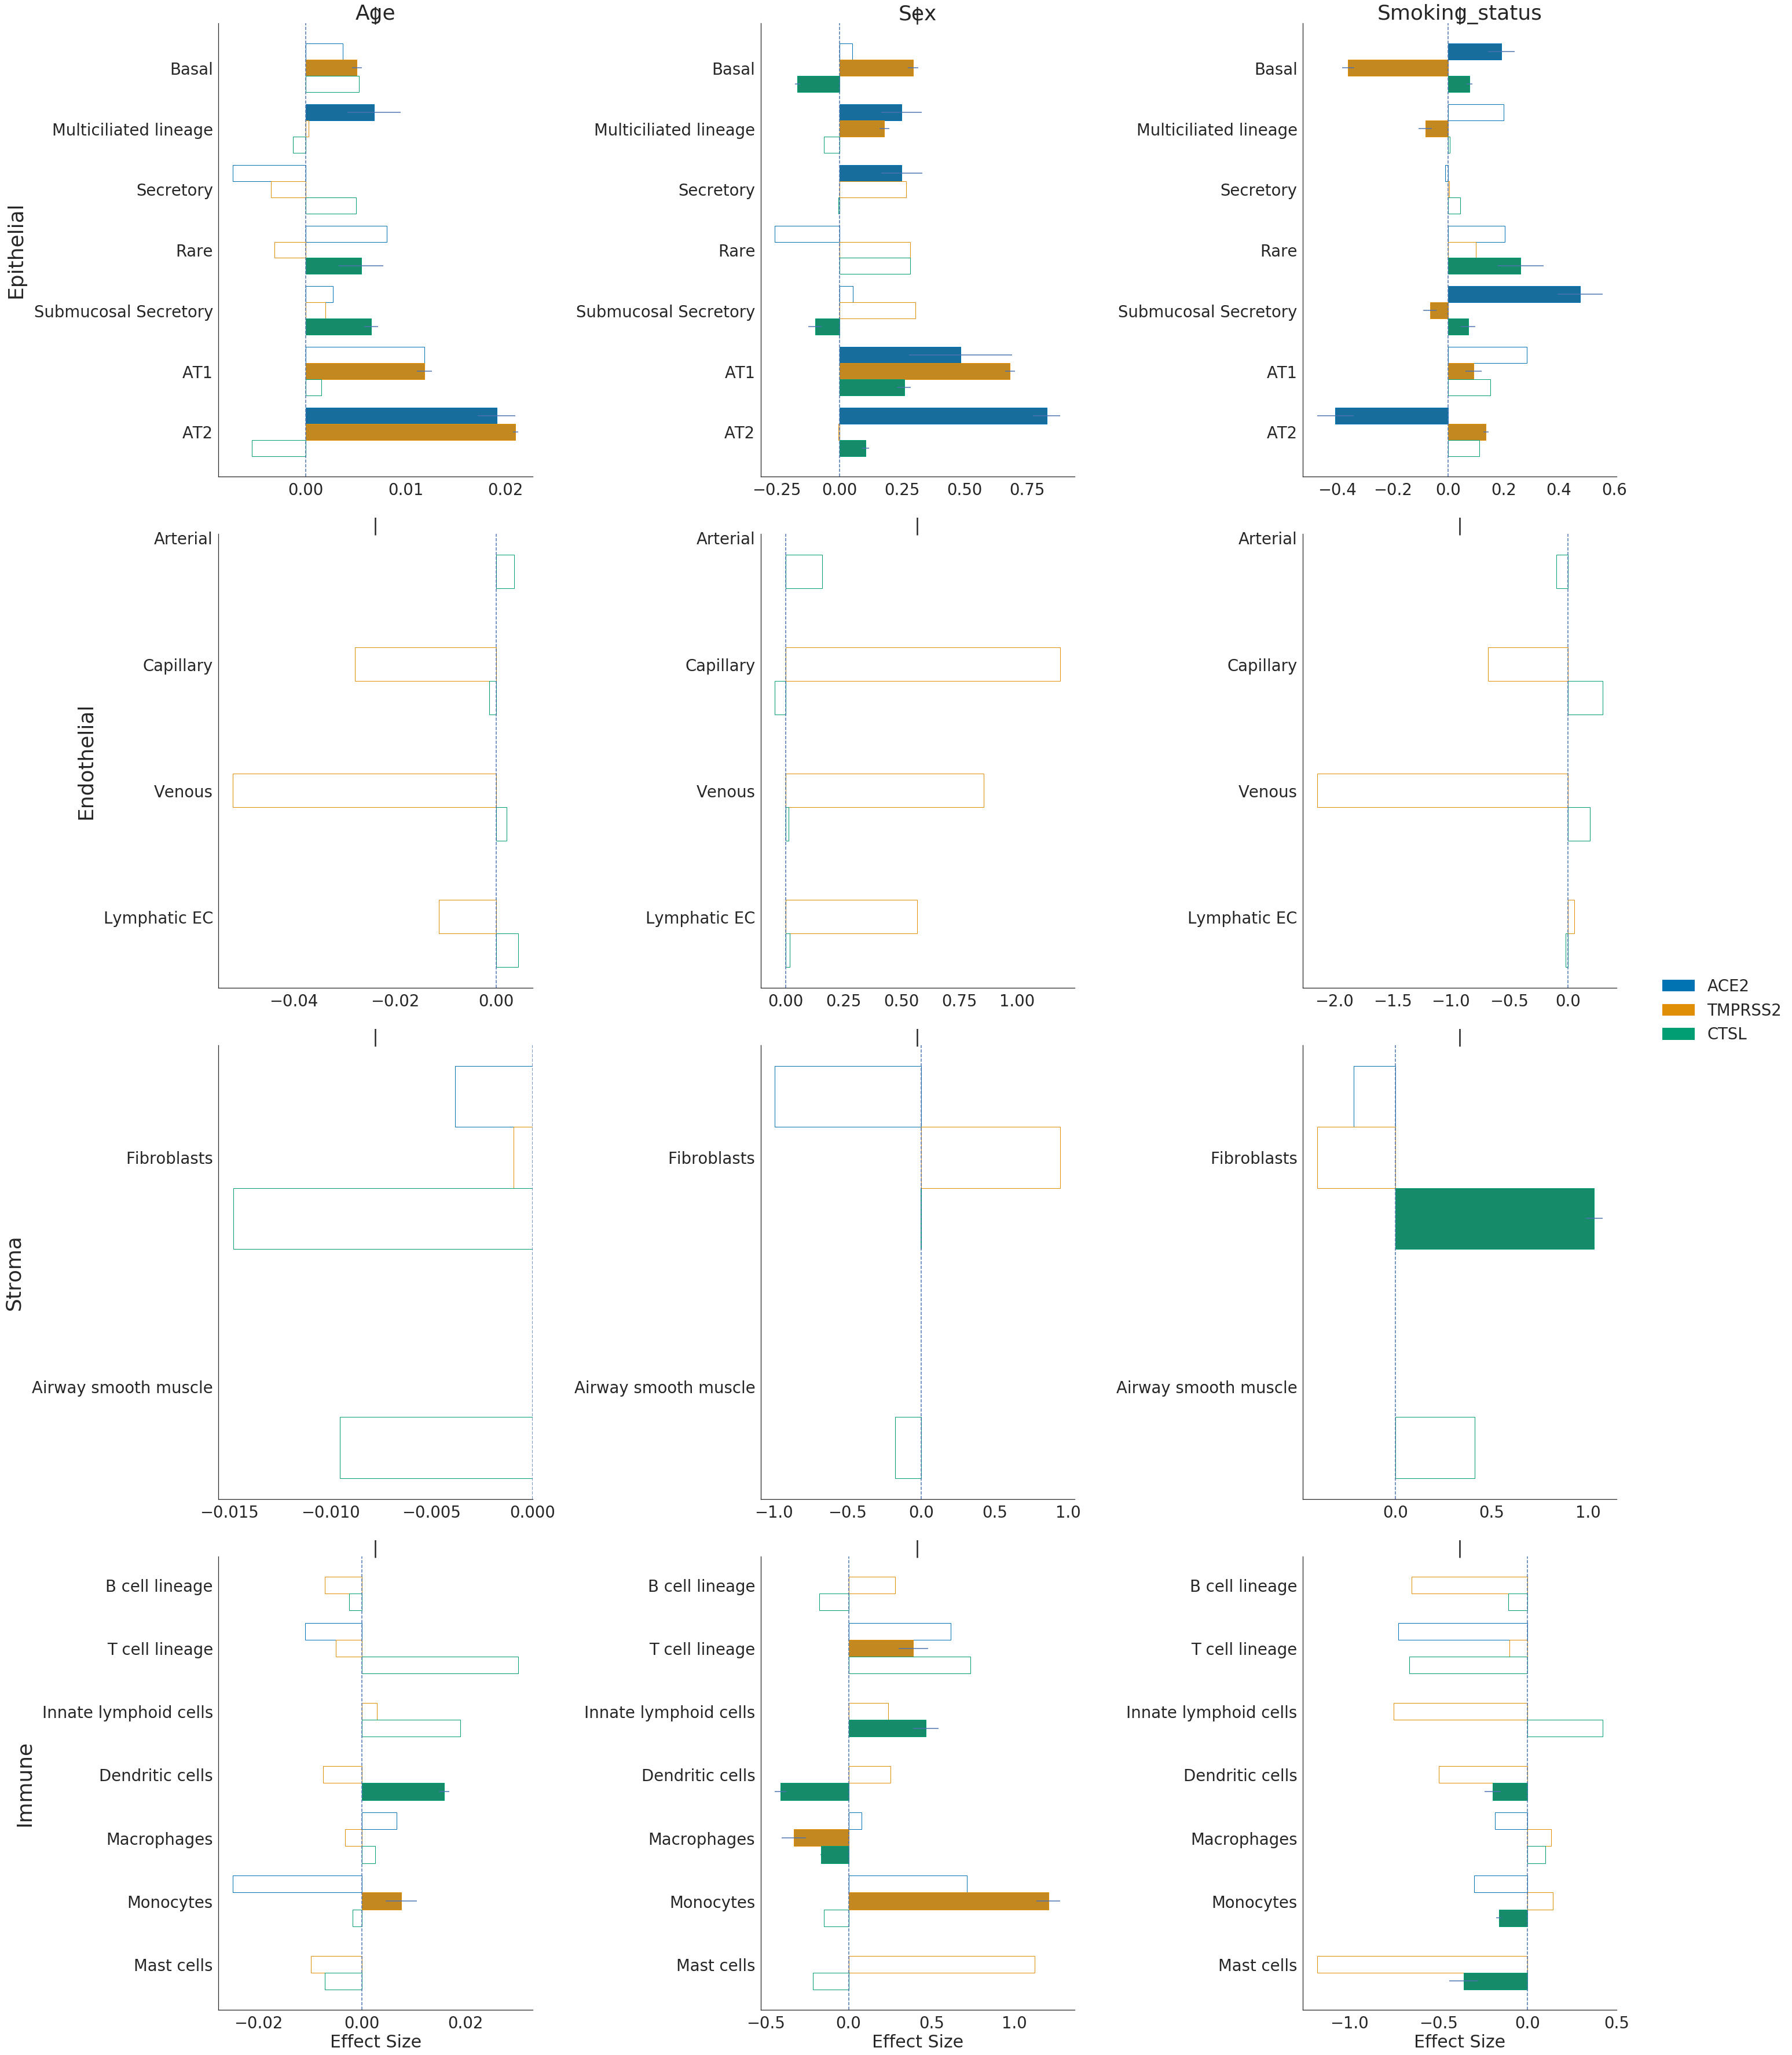

In [16]:
color_base = sns.color_palette('colorblind')[:3]
colors = color_base

gene_order = ['ACE2', 'TMPRSS2', 'CTSL']

cat_order = ['Age', 'Sex', 'Smoking_status']
comp_order = ['Epithelial', 'Endothelial', 'Stroma', 'Immune']
hue_col = 'gene'

xlims_top = [[None, None, None],
             [None, None, None],
             [None, None, None],
             [None, None, None]]
xlims_bot = [[None, None, None],
             [None ,None, None],
             [None, None, None],
             [None, None, None]]

p1 = sns.catplot(y='cell_identity', x='coef', hue=hue_col, ci=None, kind='bar', col='covariate_simple', row='compartment', sharey='none', sharex='none', orient='h', data=res_lvl3, legend=False, palette=sns.color_palette(colors), hue_order=gene_order)

for j,group in enumerate(p1.axes):
    for i,ax in enumerate(group):
        ax.axvline(0, ls='--')
        tmp = plt.setp(ax.patches, linewidth=1, edgecolor='black')
        
        dat_sub = res_lvl3.loc[(res_lvl3['covariate_simple'] == cat_order[i]) & (res_lvl3['compartment'] == comp_order[j])].copy()
        dat_sub.reset_index(inplace=True, drop=True);
        ct_dict = {ct:idx for idx,ct in enumerate(dat_sub['cell_identity'].unique())}
        bar_width = ax.patches[0].get_height()
        gen_dict = {g:(i-1)*bar_width for i,g in enumerate(gene_order)}
        offset_yloc = res_lvl3.groupby(['compartment'])['cell_identity'].nunique()[comp_order[:j]].sum()
        dat_sub['yloc'] = [offset_yloc+ct_dict[ct]+gen_dict[dat_sub[hue_col][i]] for i,ct in enumerate(dat_sub['cell_identity'])]
        signif = dat_sub['signif_bulk_complex_agree'].values
        ax.errorbar(y=dat_sub['yloc'][signif], x=dat_sub['coef'][signif], xerr=dat_sub['coef_sd'][signif], linestyle='None', marker='None')
        
        ax.set_xlim(left=xlims_bot[j][i], right=xlims_top[j][i])
        
        for a in ax.patches:

            idx = dat_sub.index[np.isclose(dat_sub['yloc'], a.get_y()+(bar_width/2))]
            if len(idx) == 1:
                g = dat_sub.loc[idx]['gene'].values[0]
                a.set_edgecolor(sns.color_palette(colors)[gene_order.index(g)])
                
                if (~dat_sub.loc[idx]['signif_bulk_complex_agree']).values[0]:
                    a.set_facecolor('white')

p1.set_titles(row_template = '', col_template = '')

p1.set_axis_labels(y_var='', x_var='Effect Size')
p1.fig.set_size_inches(40,50)

for ax, col in zip(p1.axes[0], cat_order):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 6),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(p1.axes[:,0], comp_order):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 6, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

leg_ace2 = patches.Patch(color=colors[0], label='ACE2')
leg_tmprss2 = patches.Patch(color=colors[1], label='TMPRSS2')
leg_ctsl = patches.Patch(color=colors[2], label='CTSL')
plt.legend(handles=[leg_ace2, leg_tmprss2, leg_ctsl], bbox_to_anchor = [1.1, 2.1], frameon=False, title=None)

plt.savefig(folder+'/'+output_folder+base+'_nUMIoffset_noInts_annlvl3_barplots_lvl1_separated_lim.pdf', dpi=300, bbox_inches='tight')

In [17]:
res_lvl3.sort_values(by=['cell_identity', 'covariate', 'gene'])

,gene,cell_identity,covariate,coef,coef_sd,pval,adj_pvals,compartment,signif_bulk_agree,signif_bulk_complex_agree,covariate_simple
Basal_age_ACE2,ACE2,Basal,age,0.003719,0.001304,4.346742e-03,4.890085e-03,Epithelial,False,False,Age
Basal_age_CTSL,CTSL,Basal,age,0.005348,0.000297,1.908543e-72,1.717688e-71,Epithelial,False,False,Age
Basal_age_TMPRSS2,TMPRSS2,Basal,age,0.005119,0.000486,5.922030e-26,1.065965e-25,Epithelial,True,True,Age
Basal_sex[T.male]_ACE2,ACE2,Basal,sex[T.male],0.050698,0.047738,2.882331e-01,2.882331e-01,Epithelial,False,False,Sex
Basal_sex[T.male]_CTSL,CTSL,Basal,sex[T.male],-0.167472,0.010586,2.235890e-56,6.707671e-56,Epithelial,True,True,Sex
Basal_sex[T.male]_TMPRSS2,TMPRSS2,Basal,sex[T.male],0.294338,0.019865,1.137475e-49,2.559319e-49,Epithelial,True,True,Sex
Basal_smoking_status[T.True]_ACE2,ACE2,Basal,smoking_status[T.True],0.191025,0.048163,7.301195e-05,9.387251e-05,Epithelial,True,True,Smoking_status
Basal_smoking_status[T.True]_CTSL,CTSL,Basal,smoking_status[T.True],0.077169,0.010720,6.077707e-13,9.116561e-13,Epithelial,True,True,Smoking_status
Basal_smoking_status[T.True]_TMPRSS2,TMPRSS2,Basal,smoking_status[T.True],-0.360639,0.022005,2.284573e-60,1.028058e-59,Epithelial,True,True,Smoking_status
Multiciliated_lineage_age_ACE2,ACE2,Multiciliated lineage,age,0.006830,0.002665,1.038334e-02,1.869002e-02,Epithelial,True,True,Age


## Level 2

In [18]:
res_lvl2['cell_identity'].unique()

array(['Myeloid', 'Airway epithelium', 'Alveolar epithelium', 'Lymphoid',
       'Fibroblast lineage', 'Blood vessels', 'Submucosal Gland',
       'Smooth Muscle', 'Lymphatics', 'Mesothelium'], dtype=object)

In [19]:
# Prep plotting

# Order cell identity category
res_lvl2['cell_identity'] = res_lvl2['cell_identity'].astype('category').cat.set_categories(['Airway epithelium', 'Submucosal Gland', 'Alveolar epithelium', 'Blood vessels', 'Lymphatics', 'Fibroblast lineage', 'Smooth Muscle', 'Mesothelium', 'Lymphoid', 'Myeloid'], ordered=True)
res_lvl2 = res_lvl2.sort_values(by='cell_identity')

# Create hierarchy of cell identities
ct_hierarchy = {'Epithelial':['Airway epithelium', 'Submucosal Gland', 'Alveolar epithelium'], 'Endothelial':['Blood vessels', 'Lymphatics'], 'Stroma':['Fibroblast lineage', 'Smooth Muscle', 'Mesothelium'], 'Immune':['Lymphoid', 'Myeloid']}
ct_mapping_up = dict()
for key,val in ct_hierarchy.items():
    for v in val:
        ct_mapping_up[v] = key

# Assign cell type compartment covariate
res_lvl2['compartment'] = [ct_mapping_up[ct] for ct in res_lvl2['cell_identity']]        

# Check if bulk and sc effect directions agree
res_lvl2_pseudo.index = ['_'.join(vals).replace(' ','_') for vals in res_lvl2_pseudo[['cell_identity', 'covariate', 'gene']].values.tolist()]
res_lvl2.index = ['_'.join(vals).replace(' ', '_') for vals in res_lvl2[['cell_identity', 'covariate', 'gene']].values.tolist()]
res_lvl2['signif_bulk_agree'] = [(val < 0.05) and ((res_lvl2['coef'].loc[res_lvl2.index[i]]* res_lvl2_pseudo['coef'].loc[res_lvl2.index[i]]) > 0) for i,val in enumerate(res_lvl2['adj_pvals'])]


# Check if simple and complex models agree

# Check if bulk and sc effect directions agree in interaction model
res_lvl2_ints_pseudo.index = ['_'.join(vals).replace(' ','_') for vals in res_lvl2_ints_pseudo[['cell_identity', 'covariate', 'gene', 'eval_at']].values.tolist()]
res_lvl2_ints.index = ['_'.join(vals).replace(' ', '_') for vals in res_lvl2_ints[['cell_identity', 'covariate', 'gene', 'eval_at']].values.tolist()]
res_lvl2_ints['signif_bulk_agree'] = [(val < 0.05) and ((res_lvl2_ints['coef'].loc[res_lvl2_ints.index[i]]* res_lvl2_ints_pseudo['coef'].loc[res_lvl2_ints.index[i]]) > 0) for i,val in enumerate(res_lvl2_ints['adj_pvals'])]

# Criteria:
# 1. No "indication" in opposite direction (significant and pseudo agrees)
# 2. At least 1 "indication" in the correct direction.

bulk_complex_agree = []

for idx in res_lvl2.index:
    mask = [str(idx) in str(i) for i in res_lvl2_ints.index]
    tmp = res_lvl2_ints.loc[mask]
    complex_vals = tmp['coef'].loc[tmp['signif_bulk_agree'].values].values

    if len(complex_vals) == 0:
        # No indication in complex interaction model
        bulk_complex_agree.append(False)

    else:
        # Check that all indications or robust trends point in the same direction
        # as the simple model case:
        int_agree = np.all([res_lvl2['coef'].loc[idx]*val > 0 for val in complex_vals])
        val = res_lvl2['signif_bulk_agree'].loc[idx] and int_agree
        bulk_complex_agree.append(val)
        
res_lvl2['signif_bulk_complex_agree'] = bulk_complex_agree


res_lvl2['compartment'] = res_lvl2['compartment'].astype('category').cat.set_categories(['Epithelial', 'Endothelial', 'Stroma', 'Immune'], ordered=True)
res_lvl2['covariate_simple'] = res_lvl2['covariate'].astype('category').cat.rename_categories(['Age', 'Sex', 'Smoking_status'])

res_lvl2 = res_lvl2.sort_values(by=['cell_identity', 'covariate', 'gene'])

/home/icb/malte.luecken/anaconda3/envs/cov19_py/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0, 6, 'Age')

Text(0, 6, 'Sex')

Text(0, 6, 'Smoking_status')

Text(-10.0, 0, 'Epithelial')

Text(-10.0, 0, 'Endothelial')

Text(-10.0, 0, 'Stroma')

Text(-10.0, 0, 'Immune')

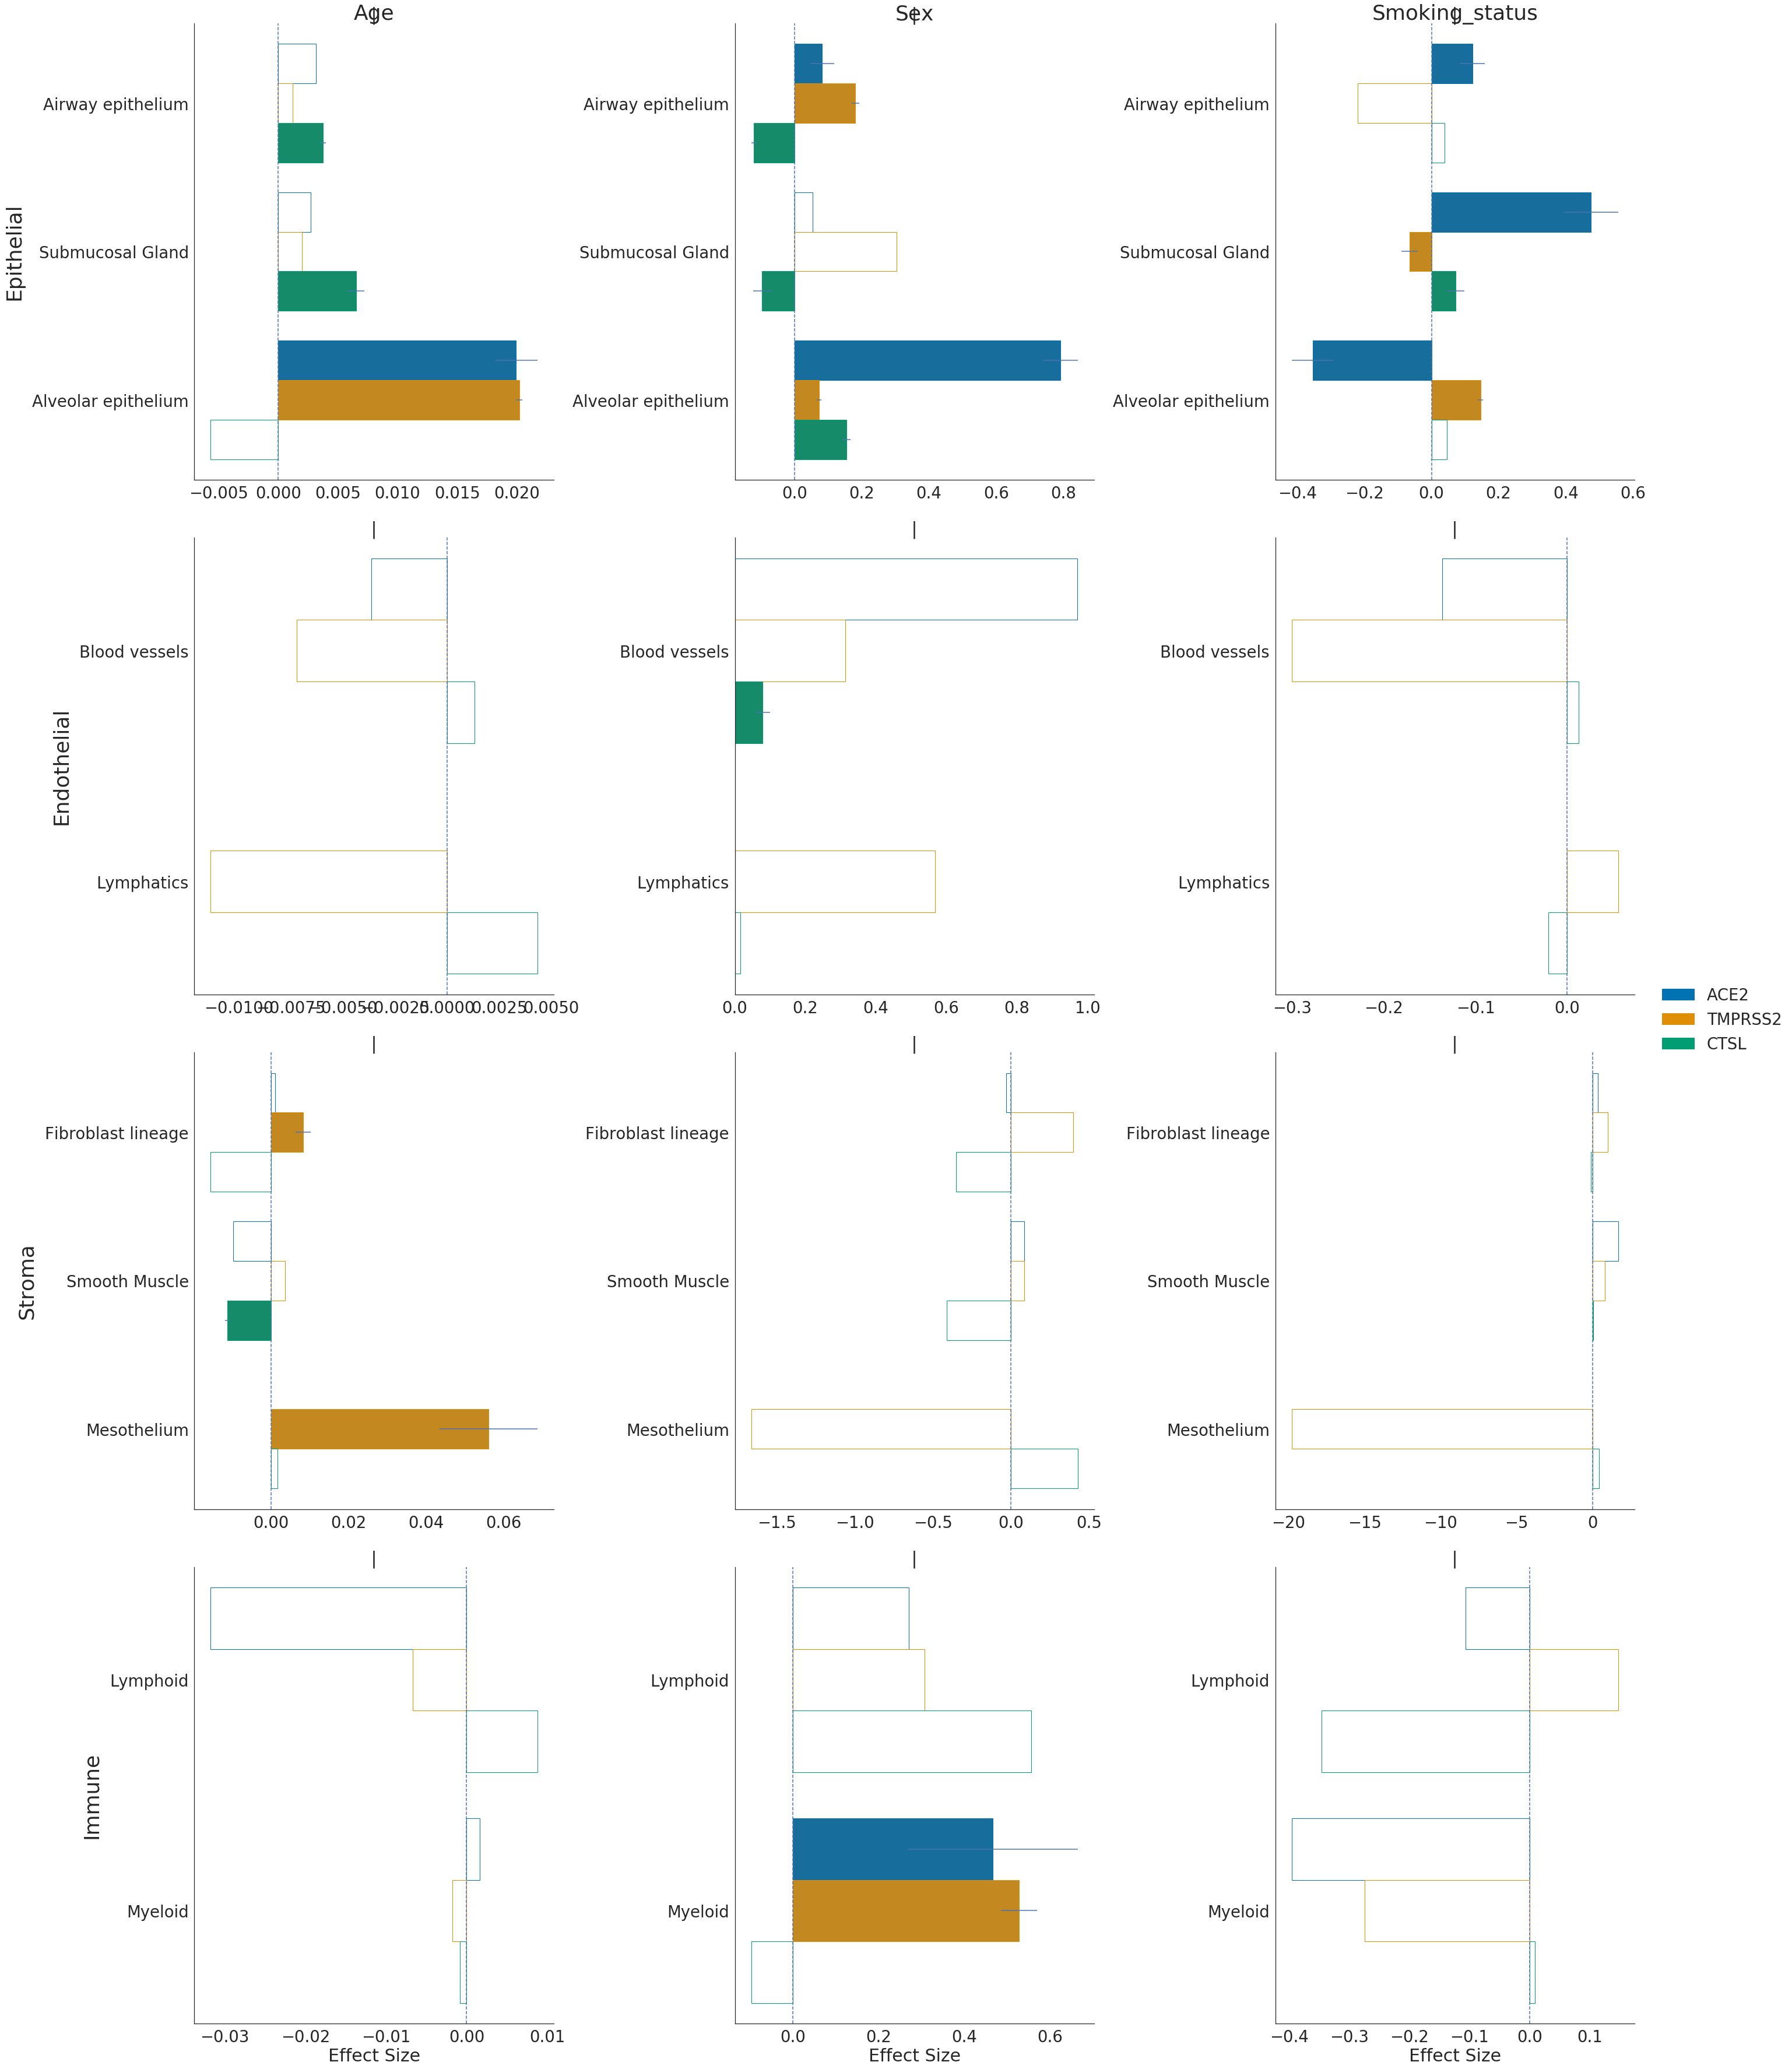

In [20]:
color_base = sns.color_palette('colorblind')[:3]
colors = color_base

gene_order = ['ACE2', 'TMPRSS2', 'CTSL']

cat_order = ['Age', 'Sex', 'Smoking_status']
comp_order = ['Epithelial', 'Endothelial', 'Stroma', 'Immune']
hue_col = 'gene'

p1 = sns.catplot(y='cell_identity', x='coef', hue=hue_col, ci=None, kind='bar', col='covariate_simple', row='compartment', sharey='none', sharex='none', orient='h', data=res_lvl2, legend=False, palette=sns.color_palette(colors), hue_order=gene_order)

for j,group in enumerate(p1.axes):
    for i,ax in enumerate(group):
        ax.axvline(0, ls='--')
        tmp = plt.setp(ax.patches, linewidth=1, edgecolor='black')
        
        dat_sub = res_lvl2.loc[(res_lvl2['covariate_simple'] == cat_order[i]) & (res_lvl2['compartment'] == comp_order[j])].copy()
        dat_sub.reset_index(inplace=True, drop=True);
        ct_dict = {ct:idx for idx,ct in enumerate(dat_sub['cell_identity'].unique())}
        bar_width = ax.patches[0].get_height()
        gen_dict = {g:(i-1)*bar_width for i,g in enumerate(gene_order)}
        offset_yloc = res_lvl2.groupby(['compartment'])['cell_identity'].nunique()[comp_order[:j]].sum()
        dat_sub['yloc'] = [offset_yloc+ct_dict[ct]+gen_dict[dat_sub[hue_col][i]] for i,ct in enumerate(dat_sub['cell_identity'])]
        signif = dat_sub['signif_bulk_complex_agree'].values
        ax.errorbar(y=dat_sub['yloc'][signif], x=dat_sub['coef'][signif], xerr=dat_sub['coef_sd'][signif], linestyle='None', marker='None')
        
        for a in ax.patches:

            idx = dat_sub.index[np.isclose(dat_sub['yloc'], a.get_y()+(bar_width/2))]
            if len(idx) == 1:
                g = dat_sub.loc[idx]['gene'].values[0]
                a.set_edgecolor(sns.color_palette(colors)[gene_order.index(g)])
                
                if (~dat_sub.loc[idx]['signif_bulk_complex_agree']).values[0]:
                    a.set_facecolor('white')

p1.set_titles(row_template = '', col_template = '')

p1.set_axis_labels(y_var='', x_var='Effect Size')
p1.fig.set_size_inches(40,50)

for ax, col in zip(p1.axes[0], cat_order):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 6),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(p1.axes[:,0], comp_order):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 6, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()


leg_ace2 = patches.Patch(color=colors[0], label='ACE2')
leg_tmprss2 = patches.Patch(color=colors[1], label='TMPRSS2')
leg_ctsl = patches.Patch(color=colors[2], label='CTSL')
plt.legend(handles=[leg_ace2, leg_tmprss2, leg_ctsl], bbox_to_anchor = [1.45, 2.3], frameon=False, title=None)

plt.savefig(folder+'/'+output_folder+base+'_nUMIoffset_noInts_annlvl2_barplots_lvl1_separated.pdf', dpi=300, bbox_inches='tight')

In [21]:
res_lvl2.sort_values(by=[ 'covariate', 'cell_identity',  'gene'])

,gene,cell_identity,covariate,coef,coef_sd,pval,adj_pvals,compartment,signif_bulk_agree,signif_bulk_complex_agree,covariate_simple
Airway_epithelium_age_ACE2,ACE2,Airway epithelium,age,0.003145,0.001069,3.263893e-03,3.671880e-03,Epithelial,False,False,Age
Airway_epithelium_age_CTSL,CTSL,Airway epithelium,age,0.003741,0.000247,7.412355e-52,2.223706e-51,Epithelial,True,True,Age
Airway_epithelium_age_TMPRSS2,TMPRSS2,Airway epithelium,age,0.001193,0.000329,2.918464e-04,4.377695e-04,Epithelial,False,False,Age
Submucosal_Gland_age_ACE2,ACE2,Submucosal Gland,age,0.002748,0.002430,2.581117e-01,2.903756e-01,Epithelial,False,False,Age
Submucosal_Gland_age_CTSL,CTSL,Submucosal Gland,age,0.006540,0.000699,8.674072e-21,3.903332e-20,Epithelial,True,True,Age
Submucosal_Gland_age_TMPRSS2,TMPRSS2,Submucosal Gland,age,0.001992,0.000584,6.522876e-04,1.174118e-03,Epithelial,True,False,Age
Alveolar_epithelium_age_ACE2,ACE2,Alveolar epithelium,age,0.019934,0.001778,3.564372e-29,5.346558e-29,Epithelial,True,True,Age
Alveolar_epithelium_age_CTSL,CTSL,Alveolar epithelium,age,-0.005651,0.000398,1.178172e-45,2.650887e-45,Epithelial,True,False,Age
Alveolar_epithelium_age_TMPRSS2,TMPRSS2,Alveolar epithelium,age,0.020185,0.000249,0.000000e+00,0.000000e+00,Epithelial,True,True,Age
Blood_vessels_age_ACE2,ACE2,Blood vessels,age,-0.003619,0.011064,7.436190e-01,7.983343e-01,Endothelial,False,False,Age


/home/icb/malte.luecken/anaconda3/envs/cov19_py/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


<ErrorbarContainer object of 3 artists>

(-0.007019450090017675, 0.023080065703996976)

<ErrorbarContainer object of 3 artists>

(-0.17770227277939335, 0.8914978720297969)

<ErrorbarContainer object of 3 artists>

(-0.46578371886329295, 0.6056349720456338)

<ErrorbarContainer object of 3 artists>

(-0.012, 0.009)

<ErrorbarContainer object of 3 artists>

(0.0, 1.0189329970524357)

<ErrorbarContainer object of 3 artists>

(-0.31816407888989323, 0.07348175634476778)

<ErrorbarContainer object of 3 artists>

(-0.019803713623538353, 0.07291383886138665)

<ErrorbarContainer object of 3 artists>

(-1.7681615103563557, 0.5331135569625425)

<ErrorbarContainer object of 3 artists>

(-20.87609312647678, 2.782534143396827)

<ErrorbarContainer object of 3 artists>

(-0.03377797389441211, 0.010806130614592055)

<ErrorbarContainer object of 3 artists>

(-0.13600901575935226, 0.7032664900523707)

<ErrorbarContainer object of 3 artists>

(-0.4226956552097493, 0.17418237802550482)

Text(0, 6, 'Age')

Text(0, 6, 'Sex')

Text(0, 6, 'Smoking_status')

Text(-10.0, 0, 'Epithelial')

Text(-10.0, 0, 'Endothelial')

Text(-10.0, 0, 'Stroma')

Text(-10.0, 0, 'Immune')

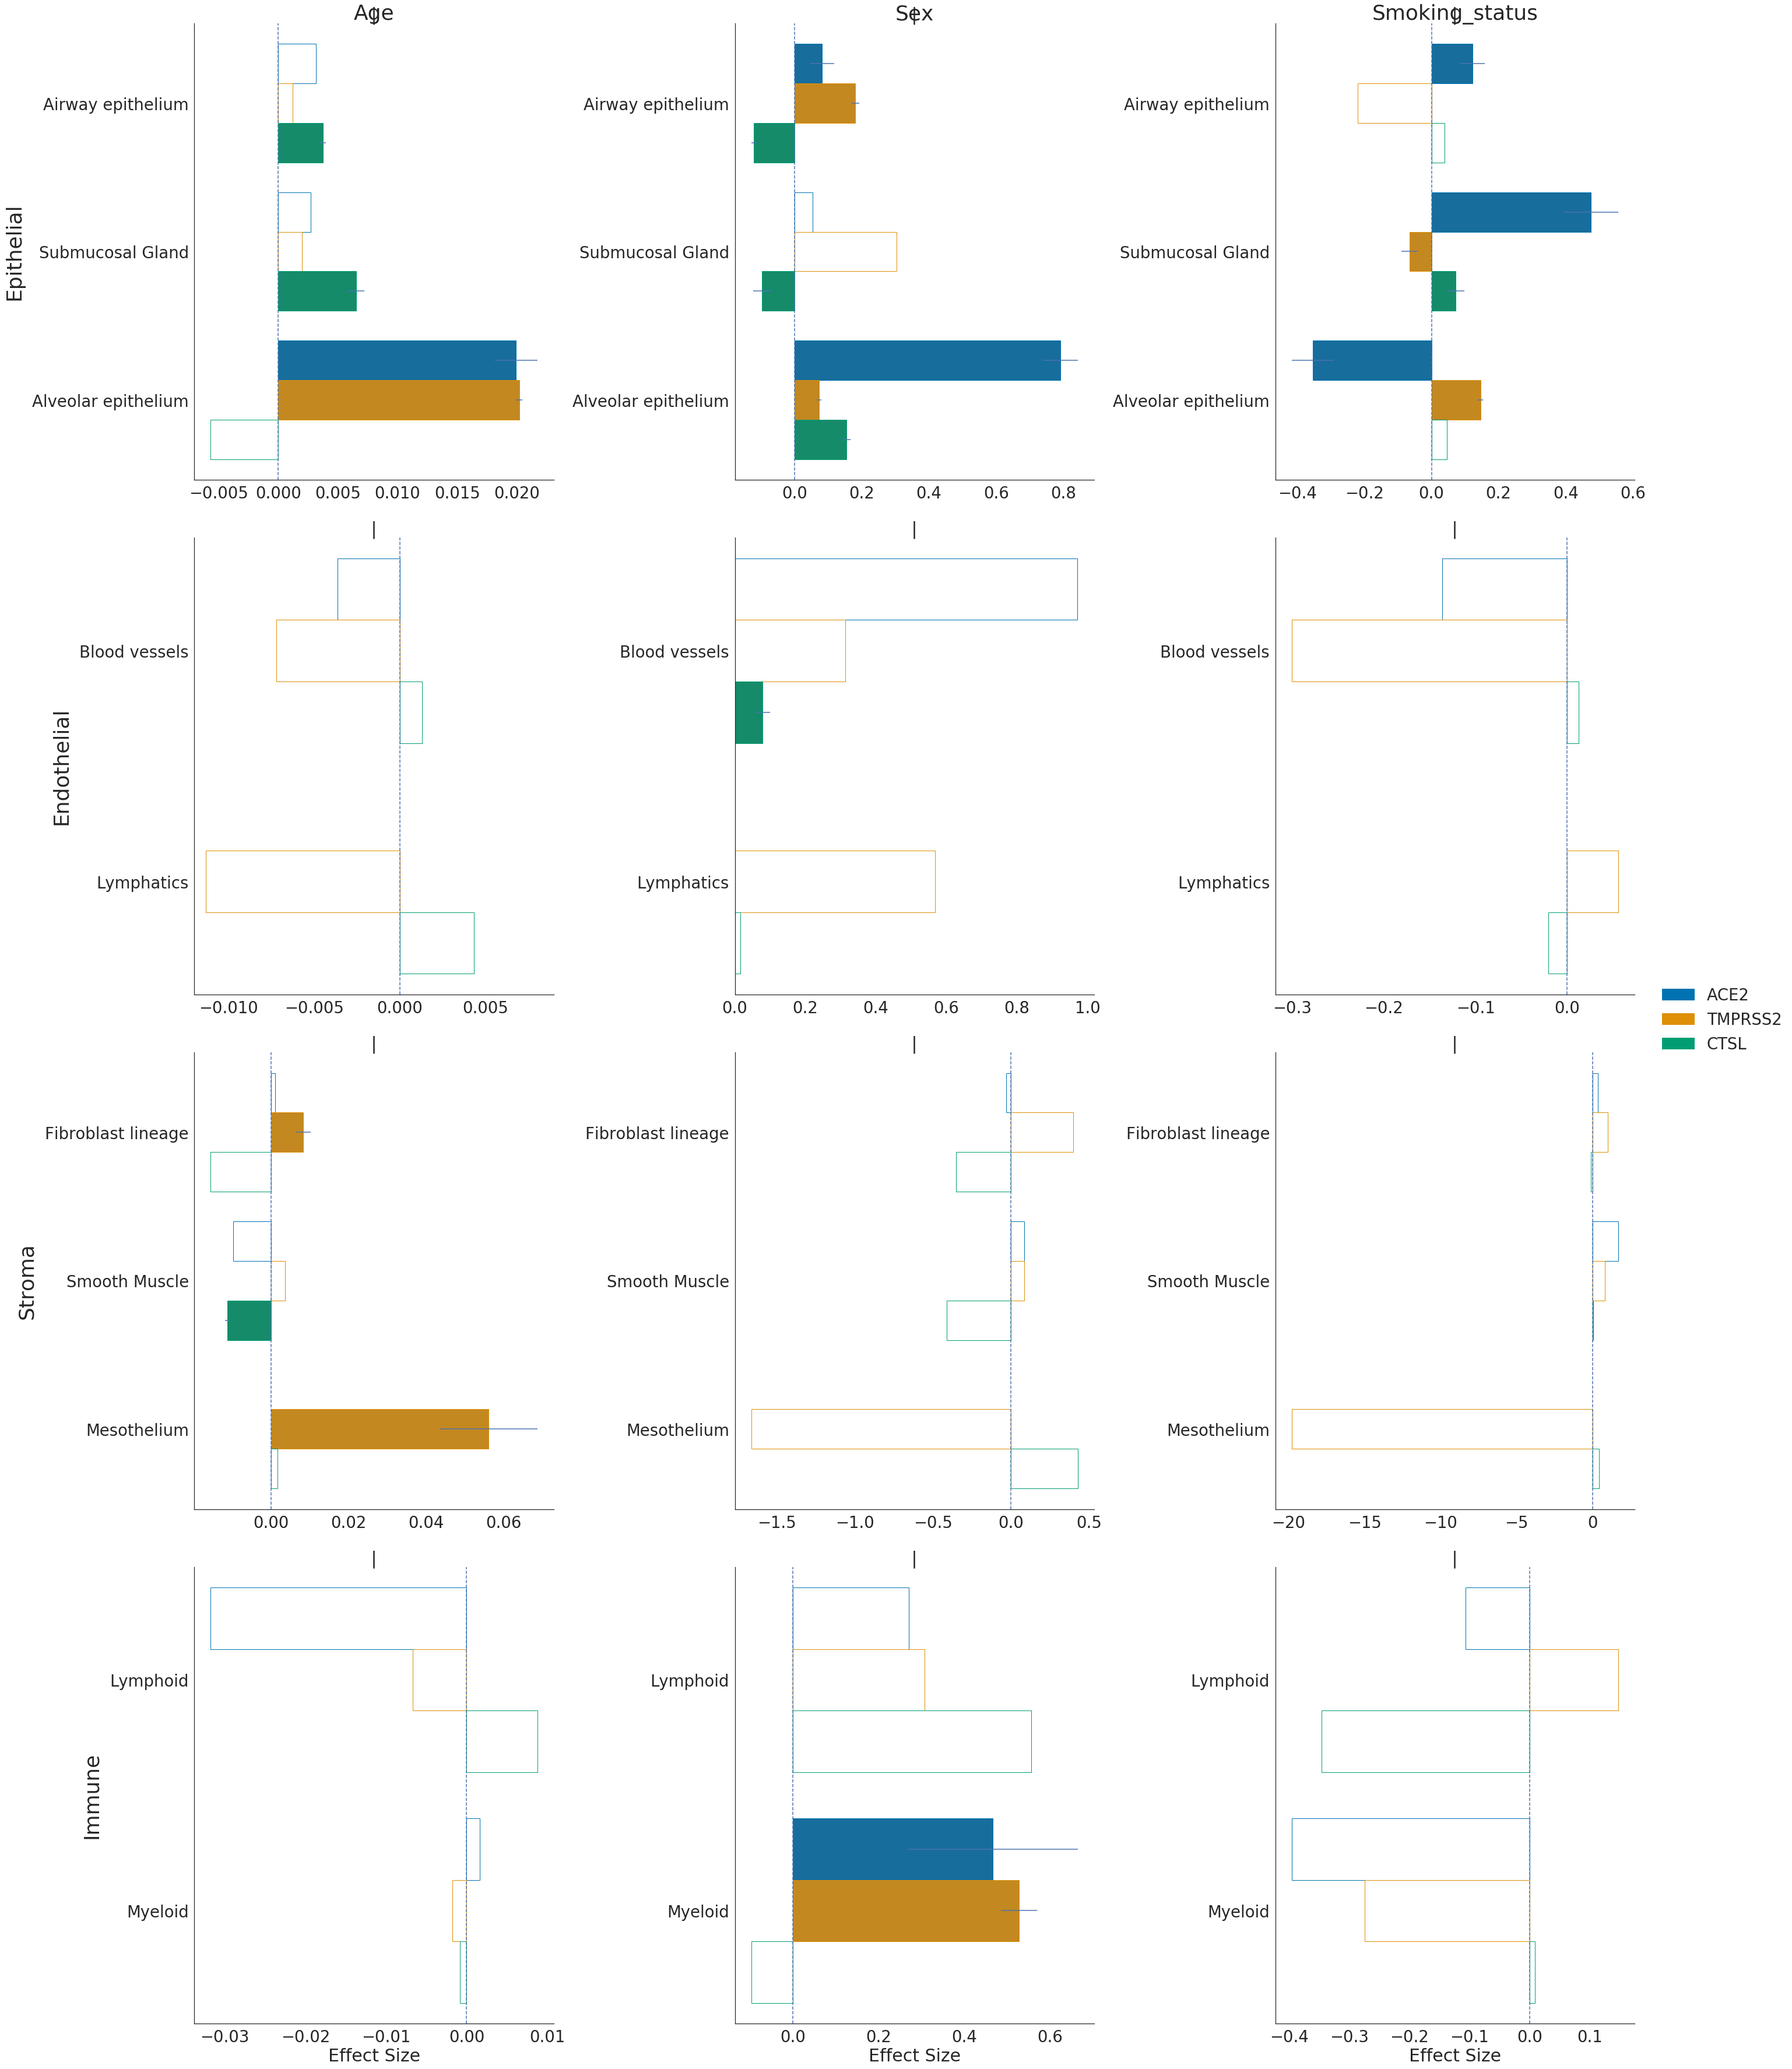

In [22]:
color_base = sns.color_palette('colorblind')[:3]
colors = color_base

gene_order = ['ACE2', 'TMPRSS2', 'CTSL']

cat_order = ['Age', 'Sex', 'Smoking_status']
comp_order = ['Epithelial', 'Endothelial', 'Stroma', 'Immune']
hue_col = 'gene'

xlims_top = [[None, None, None],
             [0.009, None, None],
             [None, None, None],
             [None, None, None]]
xlims_bot = [[None, None, None],
             [-0.012 ,None, None],
             [None, None, None],
             [None, None, None]]

p1 = sns.catplot(y='cell_identity', x='coef', hue=hue_col, ci=None, kind='bar', col='covariate_simple', row='compartment', sharey='none', sharex='none', orient='h', data=res_lvl2, legend=False, palette=sns.color_palette(colors), hue_order=gene_order)

for j,group in enumerate(p1.axes):
    for i,ax in enumerate(group):
        ax.axvline(0, ls='--')
        tmp = plt.setp(ax.patches, linewidth=1, edgecolor='black')
        
        dat_sub = res_lvl2.loc[(res_lvl2['covariate_simple'] == cat_order[i]) & (res_lvl2['compartment'] == comp_order[j])].copy()
        dat_sub.reset_index(inplace=True, drop=True);
        ct_dict = {ct:idx for idx,ct in enumerate(dat_sub['cell_identity'].unique())}
        bar_width = ax.patches[0].get_height()
        gen_dict = {g:(i-1)*bar_width for i,g in enumerate(gene_order)}
        offset_yloc = res_lvl2.groupby(['compartment'])['cell_identity'].nunique()[comp_order[:j]].sum()
        dat_sub['yloc'] = [offset_yloc+ct_dict[ct]+gen_dict[dat_sub[hue_col][i]] for i,ct in enumerate(dat_sub['cell_identity'])]
        signif = dat_sub['signif_bulk_complex_agree'].values
        ax.errorbar(y=dat_sub['yloc'][signif], x=dat_sub['coef'][signif], xerr=dat_sub['coef_sd'][signif], linestyle='None', marker='None')
        
        ax.set_xlim(left=xlims_bot[j][i], right=xlims_top[j][i])
        
        for a in ax.patches:

            idx = dat_sub.index[np.isclose(dat_sub['yloc'], a.get_y()+(bar_width/2))]
            if len(idx) == 1:
                g = dat_sub.loc[idx]['gene'].values[0]
                a.set_edgecolor(sns.color_palette(colors)[gene_order.index(g)])
                
                if (~dat_sub.loc[idx]['signif_bulk_complex_agree']).values[0]:
                    a.set_facecolor('white')

p1.set_titles(row_template = '', col_template = '')

p1.set_axis_labels(y_var='', x_var='Effect Size')
p1.fig.set_size_inches(40,50)

for ax, col in zip(p1.axes[0], cat_order):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 6),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(p1.axes[:,0], comp_order):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 6, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

leg_ace2 = patches.Patch(color=colors[0], label='ACE2')
leg_tmprss2 = patches.Patch(color=colors[1], label='TMPRSS2')
leg_ctsl = patches.Patch(color=colors[2], label='CTSL')
plt.legend(handles=[leg_ace2, leg_tmprss2, leg_ctsl], bbox_to_anchor = [1.45, 2.3], frameon=False, title=None)

plt.savefig(folder+'/'+output_folder+base+'_nUMIoffset_noInts_annlvl2_barplots_lvl1_separated_lim.pdf', dpi=300, bbox_inches='tight')